In [1]:
import json
import matplotlib.pyplot as plt

def plot(subplot_idx, L1, L2, title, xlabel='epoch', legend_list=['train','valid'], xlim=None, ylim=None):
    plt.subplot(*subplot_idx)
    plt.plot(L1)
    plt.plot(L2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend(labels=legend_list)
    plt.xlim(*xlim) if xlim else None
    plt.ylim(*ylim) if ylim else None

def plot_history(path, xlim=None):
    D = json.load(open(path,'r'))
    plt.figure(figsize=(6*3,4))
    plot((1,3,1), D['train_loss'], D['valid_loss'], 'loss', xlim=xlim)
    plot((1,3,2), D['train_f1'], D['valid_f1'], 'f1', xlim=xlim)
    plot((1,3,3), D['train_map'], D['valid_map'], 'map', xlim=xlim)
    plt.show()
    print("max_valid_map=", max(D['valid_map']), ", at_epoch=", D['valid_map'].index(max(D['valid_map'])))

{'mode': 'train', 'batch_size': 16, 'output_dim': 24, 'fine_dim': 7, 'coarse_dim': 7, 'resume': '', 'epochs': 500, 'results': 'results/exp2', 'threshold_opt': False, 'backbone': 'resnet50', 'pretrained': True, 'lambda_const': 0, 'optim_algo': 'adamw', 'lr_scheduler': 'linear', 'lr': 0.001}


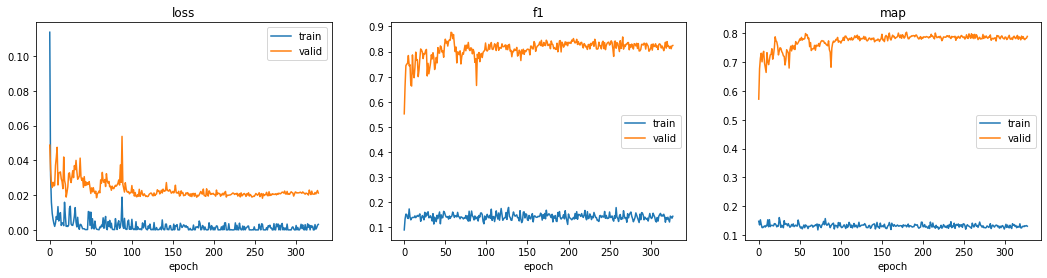

max_valid_map= 0.804282506393455 , at_epoch= 180


In [24]:
# keep
print( json.load(open("./in_only/results/exp2/args_train.json","r")) )
plot_history("./in_only/results/exp2/history_train.json", (None,None))
# valid map -> 0.901 (exclude background cls)

{'mode': 'train', 'batch_size': 16, 'output_dim': 24, 'fine_dim': 11, 'coarse_dim': 7, 'resume': '', 'epochs': 500, 'results': './results/exp1', 'threshold_opt': False, 'backbone': 'resnet50', 'pretrained': True, 'lambda_const': 1, 'optim_algo': 'adamw'}


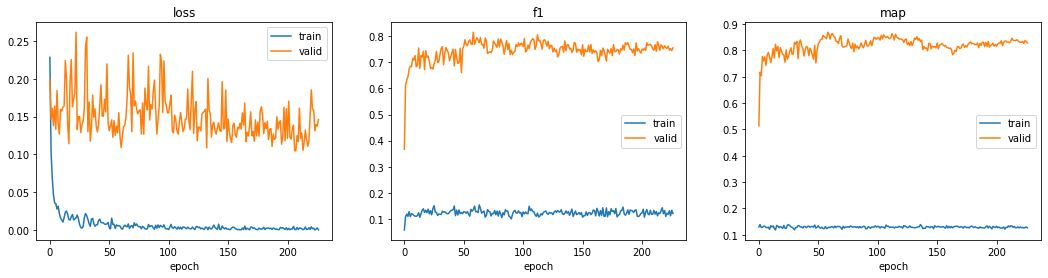

max_valid_map= 0.8692764542090812 , at_epoch= 58


In [25]:
# keep
print( json.load(open("./results/exp1/args_train.json","r")) )
plot_history("./results/exp1/history_train.json", (None,None))
# not saved (current best 0.839)
# [0.845, 0.568, 0.809, 0.815, 0.978, 0.900, 0.852, 0.940]

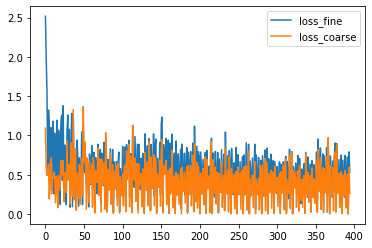

In [27]:
lf = json.load(open("./results/exp1/lf.json",'r'))
lc = json.load(open("./results/exp1/lc.json",'r'))
plt.plot(lf, label='loss_fine')
plt.plot(lc, label='loss_coarse')
plt.legend()
plt.show()

In [ ]:
# first stage
    # valid: Dermnet -> in-class
    # train: more absention classes
# second stage
    # optimizer
    # lr-scheduler